## Microsoft's *new* Movie Maker


In [199]:
# importing Pandas and Numpy to assist with the creating of DataFrames and Analysis.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
# zippedData/tn.movie_budgets.csv.gz

In [633]:
#creating the dataframe from the raw data
budgets_df = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
ratings_df = pd.read_csv("zippedData/imdb.title.ratings.csv.gz")
basics_df = pd.read_csv("zippedData/imdb.title.basics.csv.gz")
gross_df = pd.read_csv("zippedData/bom.movie_gross.csv.gz")

In [634]:
budgets_df = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")

In [635]:
budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [636]:
budgets_df.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [637]:
#change release_date to datetime
pd.to_datetime(budgets_df['release_date'])

0      2009-12-18
1      2011-05-20
2      2019-06-07
3      2015-05-01
4      2017-12-15
          ...    
5777   2018-12-31
5778   1999-04-02
5779   2005-07-13
5780   2015-09-29
5781   2005-08-05
Name: release_date, Length: 5782, dtype: datetime64[ns]

In [638]:
#looks accurate based on the head of the data, let's do it!
budgets_df['release_date'] = pd.to_datetime(budgets_df['release_date'])

In [639]:
#sanity check
budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [640]:
#now in preparing for a later merge, lets make a new column with just year
budgets_df['release_year'] = pd.DatetimeIndex(budgets_df['release_date']).year


In [641]:
#looks good!
budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017


In [642]:
#check for any created NaNs, there are none!
budgets_df.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
release_year         0
dtype: int64

In [643]:
#Removing $ from the beginning of the data and previewing. 
#Make sure to only run once!!!
budgets_df['production_budget'] = [x[1:] for x in budgets_df['production_budget']]
budgets_df['domestic_gross'] = [x[1:] for x in budgets_df['domestic_gross']]
budgets_df['worldwide_gross'] = [x[1:] for x in budgets_df['worldwide_gross']]
budgets_df.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
5777,78,2018-12-31,Red 11,"7,000",0,0,2018
5778,79,1999-04-02,Following,"6,000","48,482","240,495",1999
5779,80,2005-07-13,Return to the Land of Wonders,"5,000","1,338","1,338",2005
5780,81,2015-09-29,A Plague So Pleasant,"1,400",0,0,2015
5781,82,2005-08-05,My Date With Drew,"1,100","181,041","181,041",2005


In [644]:
#removing commas from dataframe objects that need to later be changed to integers
budgets_df['worldwide_gross'] = budgets_df['worldwide_gross'].replace(',', '', regex=True)
budgets_df['domestic_gross'] = budgets_df['domestic_gross'].replace(',', '', regex=True)
budgets_df['production_budget'] = budgets_df['production_budget'].replace(',', '', regex=True)


In [645]:
budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017


In [646]:
# setting type as integer 
budgets_df['production_budget'] = budgets_df['production_budget'].astype('int64')
budgets_df['worldwide_gross'] = budgets_df['worldwide_gross'].astype('int64')
budgets_df['domestic_gross'] = budgets_df['domestic_gross'].astype('int64')
budgets_df.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017


In [647]:
#view some data on the total_gross column. Looks like 
budgets_df["worldwide_gross"].describe().apply(lambda x: format(x, 'f'))


count          5782.000000
mean       91487460.906434
std       174719968.778905
min               0.000000
25%         4125414.750000
50%        27984448.500000
75%        97645836.500000
max      2776345279.000000
Name: worldwide_gross, dtype: object

In [648]:
# creating a new column showing total gross minus the production budget
budgets_df['gross_less_budget'] = budgets_df['worldwide_gross'] - budgets_df['production_budget']
budgets_df['gross_less_budget'].head()

0    2351345279
1     635063875
2    -200237650
3    1072413963
4     999721747
Name: gross_less_budget, dtype: int64

In [649]:
#check the basic stats on this, likely going to cut the bottom 25% of movies
budgets_df["gross_less_budget"].describe().apply(lambda x: format(x, 'f'))


count          5782.000000
mean       59899703.809927
std       146088881.081570
min      -200237650.000000
25%        -2189070.750000
50%         8550285.500000
75%        60968501.750000
max      2351345279.000000
Name: gross_less_budget, dtype: object

In [651]:
#check for duplicates
budgets_df[budgets_df.duplicated(keep=False)].sort_values(by='movie')
#appears that there are none

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,gross_less_budget


In [652]:
# check for NaN data
budgets_df.isna().sum()
# there is none (yay)

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
release_year         0
gross_less_budget    0
dtype: int64

In [653]:
budgets_df.sort_values(['worldwide_gross'], ascending=False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,gross_less_budget
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009,2351345279
42,43,1997-12-19,Titanic,200000000,659363944,2208208395,1997,2008208395
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015,1747311220
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,2018,1748134200
33,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,2015,1433854864
...,...,...,...,...,...,...,...,...
5474,75,2005-12-31,Insomnia Manica,500000,0,0,2005,-500000
5473,74,2012-07-17,Girls Gone Dead,500000,0,0,2012,-500000
5472,73,2012-04-03,Enter Nowhere,500000,0,0,2012,-500000
5471,72,2010-12-31,Drones,500000,0,0,2010,-500000


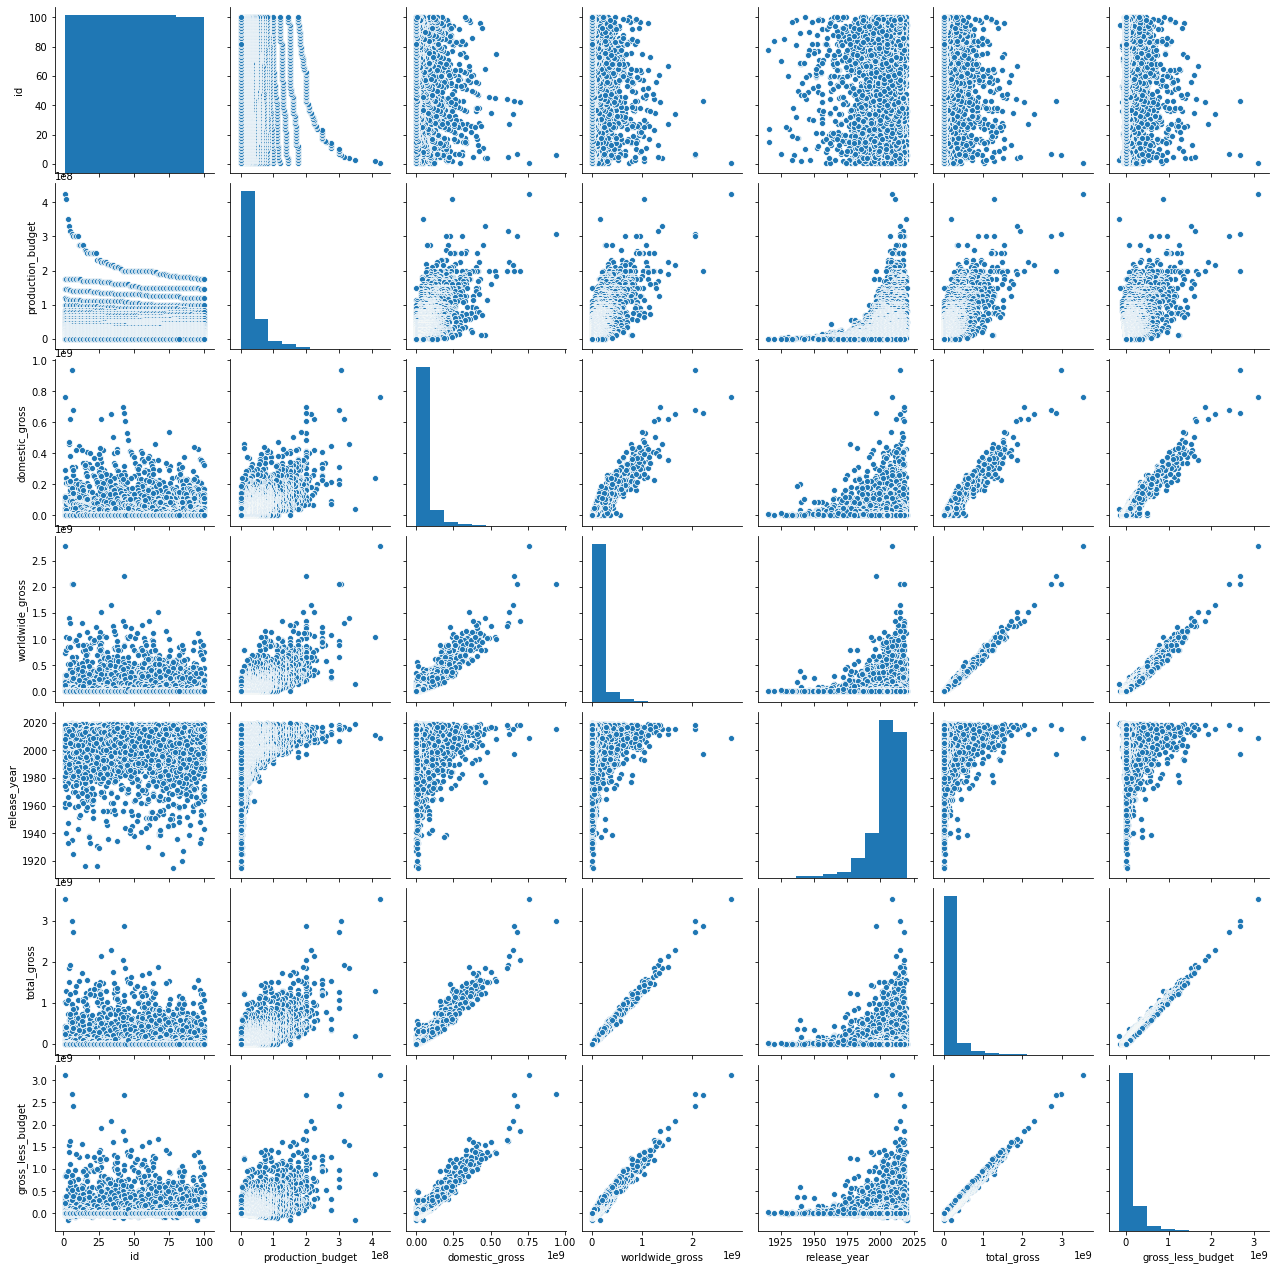

In [23]:
sns.pairplot(data=budgets_df)

In [654]:
# Cleaning the data of the rating dataframe
ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [655]:
#check for NaNs
ratings_df.isna().sum()
#there are none

tconst           0
averagerating    0
numvotes         0
dtype: int64

In [656]:
basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [657]:
print(ratings_df.info())
print(basics_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
tconst           73856 non-null object
averagerating    73856 non-null float64
numvotes         73856 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
None


In [658]:
#merge ratings and basics
basic_ratings_df = pd.merge(basics_df, ratings_df, on='tconst')
basic_ratings_df.head()


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [659]:
#All looks good, still some null values from runtime_mins, we'll fix that later
basic_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
tconst             73856 non-null object
primary_title      73856 non-null object
original_title     73856 non-null object
start_year         73856 non-null int64
runtime_minutes    66236 non-null float64
genres             73052 non-null object
averagerating      73856 non-null float64
numvotes           73856 non-null int64
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


In [660]:
#check yo work
basics_df.loc[basics_df['tconst'] == "tt0100275"]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [661]:
ratings_df.loc[ratings_df['tconst'] == "tt0100275"]

,tconst,averagerating,numvotes
1143,tt0100275,6.5,119


In [662]:
basic_ratings_df.loc[basic_ratings_df['tconst'] == "tt0100275"]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [663]:
#check any title duplicates, look into this
duplicates = basic_ratings_df[basic_ratings_df['primary_title'].duplicated(keep=False)]
duplicates.sort_values(by='primary_title').head(50)
#looks like there are some, but they are different movies based on the rest of the df


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
25949,tt2518788,1,1,2013,112.0,"Documentary,History,Sport",8.0,3452
12250,tt1859618,1,1,2019,100.0,Drama,9.2,13
52873,tt5282238,10,10,2015,90.0,Thriller,4.7,7
13822,tt1941430,10,10,2011,NaN,Action,3.4,9
12486,tt1869226,100% Love,100% Love,2011,141.0,"Comedy,Drama,Romance",7.0,2331
26727,tt2579680,100% Love,100% Love,2012,166.0,"Comedy,Drama,Romance",6.0,296
61951,tt6474850,11,11,2017,NaN,"Action,Thriller",6.4,8
33149,tt3187586,11,11,2014,87.0,"Crime,Drama,Thriller",6.2,5
14576,tt1979163,180,180,2011,107.0,"Comedy,Drama",7.4,42
12111,tt1855110,180,180,2011,121.0,"Drama,Romance",6.0,688


In [664]:
#lets get a new way to tell them apart
basic_ratings_df['title_year'] = basic_ratings_df['primary_title'] + ' (' + basic_ratings_df['start_year'].astype(str) + ')' 
basic_ratings_df.head()



,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title_year
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Sunghursh (2013)
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,One Day Before the Rainy Season (2019)
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,The Other Side of the Wind (2018)
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13,Sabse Bada Sukh (2018)
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,The Wandering Soap Opera (2017)


In [665]:
#check again for duplicates
basic_ratings_df.loc[basic_ratings_df.duplicated(subset=['title_year'])]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title_year
804,tt10275936,Raggarjävlar (Swedish Greasers),Raggarjävlar (Swedish Greasers),2019,70.0,Documentary,6.9,47,Raggarjävlar (Swedish Greasers) (2019)
1985,tt1320103,Morning,Morning,2010,95.0,Drama,5.8,134,Morning (2010)
2152,tt1336617,Cyrus,Cyrus,2010,91.0,"Comedy,Drama,Romance",6.3,32457,Cyrus (2010)
2378,tt1373454,Bad Faith,Ond tro,2010,106.0,Thriller,4.0,298,Bad Faith (2010)
3208,tt1467378,Dusk,Bein HaShmashot,2010,90.0,Drama,6.6,17,Dusk (2010)
...,...,...,...,...,...,...,...,...,...
72791,tt9181914,Bigfoot,Bigfoot,2018,86.0,"Animation,Family",2.5,55,Bigfoot (2018)
73129,tt9363208,The Guest,The Guest,2018,99.0,Thriller,6.4,66,The Guest (2018)
73210,tt9414954,Here,Iro,2018,82.0,Drama,7.3,6,Here (2018)
73645,tt9742422,Savage,Xue bao,2018,112.0,"Action,Crime,Thriller",6.6,33,Savage (2018)


In [666]:
#lets look one up
basic_ratings_df.loc[basic_ratings_df['primary_title'] == "Morning"]
#appear to be different movies and imdb verifies this, we'll operate as they are the different

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title_year
1017,tt1095417,Morning,Morning,2010,86.0,Drama,7.8,56,Morning (2010)
1985,tt1320103,Morning,Morning,2010,95.0,Drama,5.8,134,Morning (2010)


In [667]:
#look into numeric columns
basic_ratings_df.describe()
#some observations
#only 2010 - 2019, good as more modern movies are important anyhoo
##and 2020 movies would have some COVID issues
#runtime is all over the place. Gonna want to drop obscenely short/long movies
#ratings seem fine
#votes have a good deal of variance

,start_year,runtime_minutes,averagerating,numvotes
count,73856.000000,66236.000000,73856.000000,7.385600e+04
mean,2014.276132,94.654040,6.332729,3.523662e+03
std,2.614807,208.574111,1.474978,3.029402e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.400000e+01
50%,2014.000000,91.000000,6.500000,4.900000e+01
75%,2016.000000,104.000000,7.400000,2.820000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


In [668]:
basic_ratings_df[['tconst','primary_title', 'original_title', 'genres']].describe()
#overall looks fine, still some nans to explore 
#some movies have the same title, but appear to be different movies based off previous research into this
#lots of drama

,tconst,primary_title,original_title,genres
count,73856,73856,73856,73052
unique,73856,69993,71097,923
top,tt1830477,The Return,Lucky,Drama
freq,1,11,9,11612


In [669]:
#one last check for duplicates 
basic_ratings_df.duplicated(subset=['tconst']).sum()
#nice

0

In [670]:
#now lets check for nulls
basic_ratings_df.isna().sum()


tconst                0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
title_year            0
dtype: int64

In [671]:
#so we must address this so we don't have major issues
#let's fill missing genres with 'unknown' as this is not currently in the dataset
#let's check out those runtime min movies
basic_ratings_df['genres'] = basic_ratings_df['genres'].fillna('Unknown')
basic_ratings_df.isna().sum()


tconst                0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres                0
averagerating         0
numvotes              0
title_year            0
dtype: int64

In [672]:
#looking into movies with NAN runtime
is_nan = basic_ratings_df.isnull()
rows_nan = is_nan.any(axis=1)
row_nan = basic_ratings_df[rows_nan]
row_nan.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title_year
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13,Sabse Bada Sukh (2018)
5,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",4.1,32,Bigfoot (2017)
17,tt0250404,Godfather,Godfather,2012,NaN,"Crime,Drama",6.7,236,Godfather (2012)
21,tt0263814,On kadin,On kadin,2019,NaN,Drama,7.1,100,On kadin (2019)
26,tt0285423,Abolição,Abolição,2019,NaN,Documentary,7.4,35,Abolição (2019)


In [673]:
row_nan.sort_values('numvotes', ascending = False)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title_year
27512,tt2645104,Romantik Komedi 2: Bekarliga Veda,Romantik Komedi 2: Bekarliga Veda,2013,NaN,Comedy,5.3,2782,Romantik Komedi 2: Bekarliga Veda (2013)
34279,tt3283664,Sevkat Yerimdar,Sevkat Yerimdar,2013,NaN,"Comedy,Romance",5.4,1853,Sevkat Yerimdar (2013)
46388,tt4508986,What's Left of You,Senden Bana Kalan,2015,NaN,"Drama,Romance",6.7,1843,What's Left of You (2015)
40130,tt3810602,B.O.K.: Bi O Kalmisti,B.O.K.: Bi O Kalmisti,2016,NaN,"Comedy,Fantasy",5.1,1735,B.O.K.: Bi O Kalmisti (2016)
10511,tt1796395,Alzheimer's,Alzheimer's,2010,NaN,"Comedy,Drama",6.4,1675,Alzheimer's (2010)
...,...,...,...,...,...,...,...,...,...
35305,tt3378124,Flying Solo,Flying Solo,2013,NaN,Documentary,6.6,5,Flying Solo (2013)
56362,tt5752930,Libertas,Libertas,2018,NaN,Drama,8.0,5,Libertas (2018)
56313,tt5744884,Vampires vs. Zombies,Vampires vs. Zombies,2013,NaN,Comedy,4.0,5,Vampires vs. Zombies (2013)
56307,tt5743856,Dead Hunt,Dead Hunt,2016,NaN,Horror,6.8,5,Dead Hunt (2016)


In [674]:
row_nan.sort_values('averagerating', ascending = False)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title_year
49925,tt4944240,Dog Days in the Heartland,Dog Days in the Heartland,2017,NaN,Drama,10.0,5,Dog Days in the Heartland (2017)
73616,tt9715646,Renegade,Renegade,2019,NaN,Documentary,10.0,20,Renegade (2019)
53408,tt5344358,All Around Us,All Around Us,2019,NaN,Documentary,10.0,6,All Around Us (2019)
59535,tt6143970,La Lección de Anatomía,La Lección de Anatomía,2019,NaN,Documentary,9.8,28,La Lección de Anatomía (2019)
73809,tt9880724,Verdict 19,Verdict 19,2019,NaN,"Biography,Documentary,Drama",9.8,28,Verdict 19 (2019)
...,...,...,...,...,...,...,...,...,...
24372,tt2404411,The Abandoned Project X,The Abandoned Project X,2013,NaN,"Action,Sci-Fi,Thriller",1.0,21,The Abandoned Project X (2013)
63359,tt6749562,Between the Walls,Between the Walls,2018,NaN,Thriller,1.0,8,Between the Walls (2018)
17884,tt2125489,Denpo-biyori,Denpo-biyori,2011,NaN,Drama,1.0,21,Denpo-biyori (2011)
54758,tt5546274,Chains of Mephistopheles,Chains of Mephistopheles,2016,NaN,Horror,1.0,19,Chains of Mephistopheles (2016)


In [675]:
row_nan.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,7620.000000,0.0,7620.000000,7620.000000
mean,2014.479921,NaN,6.426640,43.027822
std,2.728949,NaN,1.608632,97.689502
min,2010.000000,NaN,1.000000,5.000000
25%,2012.000000,NaN,5.400000,8.000000
50%,2015.000000,NaN,6.600000,15.000000
75%,2017.000000,NaN,7.600000,36.000000
max,2019.000000,NaN,10.000000,2782.000000


In [676]:

row_nan.info()
#look to be mostly foreign films and but is roughly 10% of the data
#overall, I'm going to cut them
#75% of their votes are insignificant, most of the movies below 7 rating


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7620 entries, 3 to 73854
Data columns (total 9 columns):
tconst             7620 non-null object
primary_title      7620 non-null object
original_title     7620 non-null object
start_year         7620 non-null int64
runtime_minutes    0 non-null float64
genres             7620 non-null object
averagerating      7620 non-null float64
numvotes           7620 non-null int64
title_year         7620 non-null object
dtypes: float64(2), int64(2), object(5)
memory usage: 595.3+ KB


In [677]:
(7620 / 73586)*100

10.355230614519066

In [678]:
basic_ratings_df.dropna(inplace=True)
basic_ratings_df.isna().sum()
#nice

tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
title_year         0
dtype: int64

In [679]:
#check on the data of runtime now w/o the NaN movies
basic_ratings_df['runtime_minutes'].describe()
#not at all

count    66236.000000
mean        94.654040
std        208.574111
min          3.000000
25%         81.000000
50%         91.000000
75%        104.000000
max      51420.000000
Name: runtime_minutes, dtype: float64

In [680]:
#Ok, now let separate out the genres so that we can do more analysis into which are popular genres and how they perform in the boxoffice
genres_col = basic_ratings_df['genres'].str.split(',')
genres_col


0                [Action, Crime, Drama]
1                    [Biography, Drama]
2                               [Drama]
4              [Comedy, Drama, Fantasy]
6        [Adventure, Animation, Comedy]
                      ...              
73849                           [Drama]
73850                     [Documentary]
73851                     [Documentary]
73852                   [Drama, Family]
73855                     [Documentary]
Name: genres, Length: 66236, dtype: object

In [681]:
#getting a list of all possible genres
genres_list = []
for row in genres_col:
    for item in row:
        genres_list.append(item)
genres_list = sorted(list(set(genres_list)))

In [682]:
genres_list

['Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Thriller',
 'Unknown',
 'War',
 'Western']

In [683]:
#creating a dataframe of genres
genres_df = pd.DataFrame(genres_col)

In [684]:
genres_df.head()

,genres
0,"[Action, Crime, Drama]"
1,"[Biography, Drama]"
2,[Drama]
4,"[Comedy, Drama, Fantasy]"
6,"[Adventure, Animation, Comedy]"


In [685]:
#creating new columns for each genre that start out at 0, and move to 1 if there is a genre attributed
for col in genres_list:
    genres_df[col] = 0

In [686]:
genres_df.head()

,genres,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,Unknown,War,Western
0,"[Action, Crime, Drama]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"[Biography, Drama]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,[Drama],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"[Comedy, Drama, Fantasy]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,"[Adventure, Animation, Comedy]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [687]:
#check to verify if genre is in a cell
'Drama' in genres_df['genres'][4]

True

In [688]:
#create a loop that adds the ones in where needed
for row in genres_df.index:
    for genre in genres_list:
        if genre in genres_df['genres'][row]:
            genres_df[genre][row] = 1

/Users/matthewnykaza/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [689]:
genres_df.head()

,genres,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,Unknown,War,Western
0,"[Action, Crime, Drama]",1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,"[Biography, Drama]",0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,[Drama],0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,"[Comedy, Drama, Fantasy]",0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,"[Adventure, Animation, Comedy]",0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [690]:
#check to see if merge will be successful
print(len(genres_df.index))
print(len(basic_ratings_df.index))

66236
66236


In [691]:
#complete merge
basic_ratings_df = pd.concat([basic_ratings_df, genres_df[genres_list]], axis=1)


In [692]:
basic_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66236 entries, 0 to 73855
Data columns (total 36 columns):
tconst             66236 non-null object
primary_title      66236 non-null object
original_title     66236 non-null object
start_year         66236 non-null int64
runtime_minutes    66236 non-null float64
genres             66236 non-null object
averagerating      66236 non-null float64
numvotes           66236 non-null int64
title_year         66236 non-null object
Action             66236 non-null int64
Adult              66236 non-null int64
Adventure          66236 non-null int64
Animation          66236 non-null int64
Biography          66236 non-null int64
Comedy             66236 non-null int64
Crime              66236 non-null int64
Documentary        66236 non-null int64
Drama              66236 non-null int64
Family             66236 non-null int64
Fantasy            66236 non-null int64
Game-Show          66236 non-null int64
History            66236 non-null int64
Ho

In [693]:
#which genres are most popular
genre_sum_dict = {}
for genre in genres_list:
    genre_sum_dict[genre] = basic_ratings_df[genre].sum()

In [694]:
genre_sum_dict

{'Action': 6297,
 'Adult': 2,
 'Adventure': 3621,
 'Animation': 1615,
 'Biography': 3693,
 'Comedy': 15514,
 'Crime': 4338,
 'Documentary': 16423,
 'Drama': 28394,
 'Family': 3231,
 'Fantasy': 1969,
 'Game-Show': 2,
 'History': 2704,
 'Horror': 6917,
 'Music': 1844,
 'Musical': 638,
 'Mystery': 2889,
 'News': 575,
 'Reality-TV': 13,
 'Romance': 5976,
 'Sci-Fi': 2048,
 'Short': 1,
 'Sport': 1099,
 'Thriller': 7583,
 'Unknown': 516,
 'War': 795,
 'Western': 256}

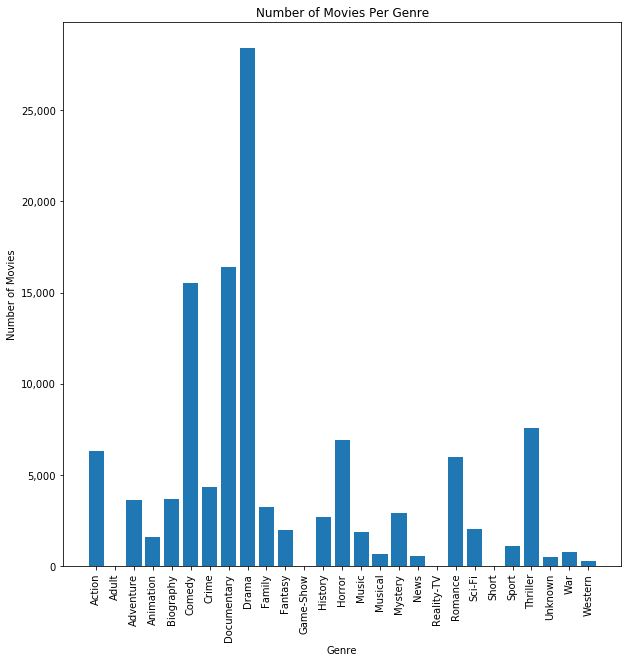

In [695]:
#visualize
plt.figure(figsize = (10, 10))
plt.bar(genre_sum_dict.keys(), genre_sum_dict.values())

plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.xticks(rotation=90)

plt.title('Number of Movies Per Genre')
plt.ylabel("Number of Movies")
plt.xlabel("Genre")


plt.show()

In [696]:
#now merge all of our data
basic_ratings_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title_year,Action,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,Unknown,War,Western
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Sunghursh (2013),1,...,0,0,0,0,0,0,0,0,0,0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,One Day Before the Rainy Season (2019),0,...,0,0,0,0,0,0,0,0,0,0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,The Other Side of the Wind (2018),0,...,0,0,0,0,0,0,0,0,0,0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,The Wandering Soap Opera (2017),0,...,0,0,0,0,0,0,0,0,0,0
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263,Joe Finds Grace (2017),0,...,0,0,0,0,0,0,0,0,0,0


In [697]:
budgets_df['release_year'].unique()

array([2009, 2011, 2019, 2015, 2017, 2018, 2007, 2012, 2013, 2010, 2016,
       2014, 2006, 2008, 2005, 1997, 2004, 1999, 1995, 2003, 2001, 2020,
       2002, 1998, 2000, 1991, 1994, 1996, 1993, 1992, 1988, 1990, 1989,
       1978, 1981, 1984, 1982, 1985, 1980, 1963, 1987, 1986, 1983, 1979,
       1977, 1970, 1969, 1976, 1965, 1962, 1964, 1959, 1966, 1974, 1956,
       1975, 1973, 1960, 1967, 1968, 1971, 1951, 1972, 1961, 1946, 1944,
       1953, 1954, 1957, 1952, 1930, 1939, 1925, 1950, 1948, 1958, 1943,
       1940, 1945, 1947, 1938, 1927, 1949, 1955, 1936, 1937, 1941, 1942,
       1933, 1935, 1931, 1916, 1929, 1934, 1915, 1920])

In [698]:
#remove all movies before 2010 so it best matches with other dataset
budgets_df = budgets_df[~(budgets_df['release_date'] <= '2009-12-31')]
budgets_df['release_year'].unique()

array([2011, 2019, 2015, 2017, 2018, 2012, 2013, 2010, 2016, 2014, 2020])

In [699]:
budgets_df[budgets_df['movie'].str.contains("\(")].head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,gross_less_budget
2785,86,2014-10-17,Birdman or (The Unexpected Virtue of Ignorance),18000000,42340598,103215094,2014,85215094
4461,62,2016-12-31,Airlift (2016),4400000,0,9969237,2016,5569237
5010,11,2013-02-08,ABCD (Any Body Can Dance),1900000,222098,10137234,2013,8237234


In [700]:
for row in budgets_df.index:
    if "(" in budgets_df['movie'][row]:
        split = budgets_df['movie'][row].split(" (")
        if "201" in split[1]: # this will get rid of things labeled re-release or re-issue, which is fine
            budgets_df['movie'][row] = split[0]

In [701]:
budgets_df[budgets_df['movie'].str.contains("\(")].head(10)
#we got rid of the one that already had the year.

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,gross_less_budget
2785,86,2014-10-17,Birdman or (The Unexpected Virtue of Ignorance),18000000,42340598,103215094,2014,85215094
5010,11,2013-02-08,ABCD (Any Body Can Dance),1900000,222098,10137234,2013,8237234


In [702]:
#now lets add a column that is movie(year) to help with merging
budgets_df['title_year'] = budgets_df['movie'] + ' (' + budgets_df['release_year'].astype(str) + ')' 
budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,gross_less_budget,title_year
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,635063875,Pirates of the Caribbean: On Stranger Tides (2...
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,-200237650,Dark Phoenix (2019)
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,1072413963,Avengers: Age of Ultron (2015)
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,999721747,Star Wars Ep. VIII: The Last Jedi (2017)
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015,1747311220,Star Wars Ep. VII: The Force Awakens (2015)


In [703]:
budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,gross_less_budget,title_year
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,635063875,Pirates of the Caribbean: On Stranger Tides (2...
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,-200237650,Dark Phoenix (2019)
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,1072413963,Avengers: Age of Ultron (2015)
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,999721747,Star Wars Ep. VIII: The Last Jedi (2017)
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015,1747311220,Star Wars Ep. VII: The Force Awakens (2015)


In [704]:
basic_ratings_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title_year,Action,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,Unknown,War,Western
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Sunghursh (2013),1,...,0,0,0,0,0,0,0,0,0,0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,One Day Before the Rainy Season (2019),0,...,0,0,0,0,0,0,0,0,0,0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,The Other Side of the Wind (2018),0,...,0,0,0,0,0,0,0,0,0,0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,The Wandering Soap Opera (2017),0,...,0,0,0,0,0,0,0,0,0,0
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263,Joe Finds Grace (2017),0,...,0,0,0,0,0,0,0,0,0,0


In [705]:
#check for dups
budgets_df.duplicated(subset=['title_year']).sum()

0

In [706]:
#see what we will lose
print(len(basic_ratings_df))
print(len(budgets_df))

66236
2194


In [707]:
#Would be a lot, need to do a left merge to try and preserve some data. might make two datasets for other manipulation
full_df = pd.merge(basic_ratings_df, budgets_df, how='left', on='title_year')

In [708]:
full_df.head(50)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title_year,Action,...,War,Western,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,gross_less_budget
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Sunghursh (2013),1,...,0,0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,One Day Before the Rainy Season (2019),0,...,0,0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,The Other Side of the Wind (2018),0,...,0,0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
3,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,The Wandering Soap Opera (2017),0,...,0,0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263,Joe Finds Grace (2017),0,...,0,0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
5,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,6.8,451,Pál Adrienn (2010),0,...,0,0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
6,tt0154039,So Much for Justice!,Oda az igazság,2010,100.0,History,4.6,64,So Much for Justice! (2010),0,...,0,0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
7,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,53,Cooper and Hemingway: The True Gen (2013),0,...,0,0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
8,tt0162942,Children of the Green Dragon,A zöld sárkány gyermekei,2010,89.0,Drama,6.9,120,Children of the Green Dragon (2010),0,...,0,0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
9,tt0170651,T.G.M. - osvoboditel,T.G.M. - osvoboditel,2018,60.0,Documentary,7.5,6,T.G.M. - osvoboditel (2018),0,...,0,0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [709]:
partial_df = pd.merge(basic_ratings_df, budgets_df, how='inner', on='title_year')







In [710]:
partial_df.describe()

,start_year,runtime_minutes,averagerating,numvotes,Action,Adult,Adventure,Animation,Biography,Comedy,...,Thriller,Unknown,War,Western,id,production_budget,domestic_gross,worldwide_gross,release_year,gross_less_budget
count,1491.000000,1491.000000,1491.000000,1.491000e+03,1491.000000,1491.0,1491.000000,1491.000000,1491.000000,1491.000000,...,1491.000000,1491.0,1491.000000,1491.000000,1491.000000,1.491000e+03,1.491000e+03,1.491000e+03,1491.000000,1.491000e+03
mean,2013.846412,107.425218,6.284977,1.153854e+05,0.299799,0.0,0.234071,0.067740,0.089202,0.342723,...,0.176392,0.0,0.011402,0.007378,50.865191,4.483972e+07,5.666735e+07,1.422930e+08,2013.846412,9.745333e+07
std,2.565102,18.115039,1.070252,1.642952e+05,0.458323,0.0,0.423559,0.251383,0.285131,0.474779,...,0.381281,0.0,0.106204,0.085604,28.788419,5.630027e+07,8.506418e+07,2.351482e+08,2.565102,1.938844e+08
min,2010.000000,5.000000,1.600000,5.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,1.000000,1.500000e+04,0.000000e+00,0.000000e+00,2010.000000,-2.002376e+08
25%,2012.000000,94.000000,5.700000,1.455450e+04,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,26.000000,8.000000e+06,3.245136e+06,8.526664e+06,2012.000000,-6.500000e+05
50%,2014.000000,105.000000,6.400000,5.899400e+04,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,51.000000,2.300000e+07,2.786557e+07,5.254571e+07,2014.000000,2.326278e+07
75%,2016.000000,118.000000,7.000000,1.409660e+05,1.000000,0.0,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.0,0.000000,0.000000,76.000000,5.500000e+07,6.776772e+07,1.600692e+08,2016.000000,1.065260e+08
max,2019.000000,180.000000,8.800000,1.841066e+06,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.0,1.000000,1.000000,100.000000,4.106000e+08,7.000596e+08,2.048134e+09,2019.000000,1.748134e+09


In [711]:
partial_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1491 entries, 0 to 1490
Data columns (total 44 columns):
tconst               1491 non-null object
primary_title        1491 non-null object
original_title       1491 non-null object
start_year           1491 non-null int64
runtime_minutes      1491 non-null float64
genres               1491 non-null object
averagerating        1491 non-null float64
numvotes             1491 non-null int64
title_year           1491 non-null object
Action               1491 non-null int64
Adult                1491 non-null int64
Adventure            1491 non-null int64
Animation            1491 non-null int64
Biography            1491 non-null int64
Comedy               1491 non-null int64
Crime                1491 non-null int64
Documentary          1491 non-null int64
Drama                1491 non-null int64
Family               1491 non-null int64
Fantasy              1491 non-null int64
Game-Show            1491 non-null int64
History              14

In [712]:
full_df['release_year'].unique()

array([  nan, 2012., 2013., 2014., 2015., 2011., 2010., 2019., 2016.,
       2017., 2018.])

In [713]:
#check for NaNs
partial_df.isna().sum()
#There are some in the runtime, and genre areas, need to think of ways to assist this for later analysis

tconst               0
primary_title        0
original_title       0
start_year           0
runtime_minutes      0
genres               0
averagerating        0
numvotes             0
title_year           0
Action               0
Adult                0
Adventure            0
Animation            0
Biography            0
Comedy               0
Crime                0
Documentary          0
Drama                0
Family               0
Fantasy              0
Game-Show            0
History              0
Horror               0
Music                0
Musical              0
Mystery              0
News                 0
Reality-TV           0
Romance              0
Sci-Fi               0
Short                0
Sport                0
Thriller             0
Unknown              0
War                  0
Western              0
id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
release_year         0
gross_less_

In [714]:
full_df.isna().sum()

tconst                   0
primary_title            0
original_title           0
start_year               0
runtime_minutes          0
genres                   0
averagerating            0
numvotes                 0
title_year               0
Action                   0
Adult                    0
Adventure                0
Animation                0
Biography                0
Comedy                   0
Crime                    0
Documentary              0
Drama                    0
Family                   0
Fantasy                  0
Game-Show                0
History                  0
Horror                   0
Music                    0
Musical                  0
Mystery                  0
News                     0
Reality-TV               0
Romance                  0
Sci-Fi                   0
Short                    0
Sport                    0
Thriller                 0
Unknown                  0
War                      0
Western                  0
id                   64745
r

In [715]:
partial_df.sort_values('numvotes', ascending = False)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title_year,Action,...,War,Western,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,gross_less_budget
349,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,Inception (2010),1,...,0,0,38,2010-07-16,Inception,160000000,292576195,835524642,2010,675524642
335,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769,The Dark Knight Rises (2012),1,...,0,0,11,2012-07-20,The Dark Knight Rises,275000000,448139099,1084439099,2012,809439099
71,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334,Interstellar (2014),0,...,0,0,32,2014-11-05,Interstellar,165000000,188017894,666379375,2014,501379375
730,tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",8.4,1211405,Django Unchained (2012),0,...,0,1,69,2012-12-25,Django Unchained,100000000,162805434,449948323,2012,349948323
82,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655,The Avengers (2012),1,...,0,0,27,2012-05-04,The Avengers,225000000,623279547,1517935897,2012,1292935897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,tt2049386,Alice in Wonderland,Alice in Wonderland,2010,99.0,"Fantasy,Musical",6.5,6,Alice in Wonderland (2010),0,...,0,0,51,2010-03-05,Alice in Wonderland,200000000,334191110,1025491110,2010,825491110
598,tt1825978,The Artist,The Artist,2011,100.0,Thriller,6.8,6,The Artist (2011),0,...,0,0,34,2011-11-25,The Artist,16000000,44667095,128256712,2011,112256712
756,tt3279418,Redemption,Redemption,2013,106.0,"Drama,Mystery,Thriller",8.4,5,Redemption (2013),0,...,0,0,97,2013-06-28,Redemption,23000000,36686,13593473,2013,-9406527
1424,tt5811420,Oddball,Oddball,2016,5.0,Documentary,6.4,5,Oddball (2016),0,...,0,0,63,2016-12-06,Oddball,7000000,0,10237229,2016,3237229


In [716]:
#drop original_title as it is redundant and other data that is no longer needed in this dataset 
partial_df = partial_df.drop('original_title', 1)
partial_df.head(50)

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,title_year,Action,Adult,...,War,Western,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,gross_less_budget
0,tt0249516,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,Foodfight! (2012),1,0,...,0,0,26,2012-12-31,Foodfight!,45000000,0,73706,2012,-44926294
1,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty (2013),0,0,...,0,0,37,2013-12-25,The Secret Life of Walter Mitty,91000000,58236838,187861183,2013,96861183
2,tt0365907,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,A Walk Among the Tombstones (2014),1,0,...,0,0,67,2014-09-19,A Walk Among the Tombstones,28000000,26017685,62108587,2014,34108587
3,tt0369610,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Jurassic World (2015),1,0,...,0,0,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,2015,1433854864
4,tt0376136,The Rum Diary,2011,119.0,"Comedy,Drama",6.2,94787,The Rum Diary (2011),0,0,...,0,0,16,2011-10-28,The Rum Diary,45000000,13109815,21544732,2011,-23455268
5,tt0383010,The Three Stooges,2012,92.0,"Comedy,Family",5.1,28570,The Three Stooges (2012),0,0,...,0,0,4,2012-04-13,The Three Stooges,30000000,44338224,54052249,2012,24052249
6,tt0393049,Anderson's Cross,2010,98.0,"Comedy,Drama,Romance",5.5,106,Anderson's Cross (2010),0,0,...,0,0,65,2010-12-31,Anderson's Cross,300000,0,0,2010,-300000
7,tt0398286,Tangled,2010,100.0,"Adventure,Animation,Comedy",7.8,366366,Tangled (2010),0,0,...,0,0,15,2010-11-24,Tangled,260000000,200821936,586477240,2010,326477240
8,tt0401729,John Carter,2012,132.0,"Action,Adventure,Sci-Fi",6.6,241792,John Carter (2012),1,0,...,0,0,14,2012-03-09,John Carter,275000000,73058679,282778100,2012,7778100
9,tt0427152,Dinner for Schmucks,2010,114.0,Comedy,5.9,91546,Dinner for Schmucks (2010),0,0,...,0,0,51,2010-07-30,Dinner for Schmucks,69000000,73026337,86796502,2010,17796502


In [717]:
partial_df.columns

Index(['tconst', 'primary_title', 'start_year', 'runtime_minutes', 'genres',
       'averagerating', 'numvotes', 'title_year', 'Action', 'Adult',
       'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Game-Show', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi',
       'Short', 'Sport', 'Thriller', 'Unknown', 'War', 'Western', 'id',
       'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'release_year', 'gross_less_budget'],
      dtype='object')

In [718]:
#drop other unneeded columns and create a new dataset to keep old data just in case
movie_df = partial_df.drop(['tconst', 'primary_title', 'id', 'release_year', 'movie'], axis=1)

movie_df.head()



,start_year,runtime_minutes,genres,averagerating,numvotes,title_year,Action,Adult,Adventure,Animation,...,Sport,Thriller,Unknown,War,Western,release_date,production_budget,domestic_gross,worldwide_gross,gross_less_budget
0,2012,91.0,"Action,Animation,Comedy",1.9,8248,Foodfight! (2012),1,0,0,1,...,0,0,0,0,0,2012-12-31,45000000,0,73706,-44926294
1,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty (2013),0,0,1,0,...,0,0,0,0,0,2013-12-25,91000000,58236838,187861183,96861183
2,2014,114.0,"Action,Crime,Drama",6.5,105116,A Walk Among the Tombstones (2014),1,0,0,0,...,0,0,0,0,0,2014-09-19,28000000,26017685,62108587,34108587
3,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Jurassic World (2015),1,0,1,0,...,0,0,0,0,0,2015-06-12,215000000,652270625,1648854864,1433854864
4,2011,119.0,"Comedy,Drama",6.2,94787,The Rum Diary (2011),0,0,0,0,...,0,0,0,0,0,2011-10-28,45000000,13109815,21544732,-23455268


In [719]:
#move title_year to first column as I just like it this way
col_name = 'title_year'
first_col = movie_df.pop(col_name)
movie_df.insert(0, col_name, first_col)
movie_df.head()

,title_year,start_year,runtime_minutes,genres,averagerating,numvotes,Action,Adult,Adventure,Animation,...,Sport,Thriller,Unknown,War,Western,release_date,production_budget,domestic_gross,worldwide_gross,gross_less_budget
0,Foodfight! (2012),2012,91.0,"Action,Animation,Comedy",1.9,8248,1,0,0,1,...,0,0,0,0,0,2012-12-31,45000000,0,73706,-44926294
1,The Secret Life of Walter Mitty (2013),2013,114.0,"Adventure,Comedy,Drama",7.3,275300,0,0,1,0,...,0,0,0,0,0,2013-12-25,91000000,58236838,187861183,96861183
2,A Walk Among the Tombstones (2014),2014,114.0,"Action,Crime,Drama",6.5,105116,1,0,0,0,...,0,0,0,0,0,2014-09-19,28000000,26017685,62108587,34108587
3,Jurassic World (2015),2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,1,0,1,0,...,0,0,0,0,0,2015-06-12,215000000,652270625,1648854864,1433854864
4,The Rum Diary (2011),2011,119.0,"Comedy,Drama",6.2,94787,0,0,0,0,...,0,0,0,0,0,2011-10-28,45000000,13109815,21544732,-23455268


In [720]:
movie_df.describe()

,start_year,runtime_minutes,averagerating,numvotes,Action,Adult,Adventure,Animation,Biography,Comedy,...,Short,Sport,Thriller,Unknown,War,Western,production_budget,domestic_gross,worldwide_gross,gross_less_budget
count,1491.000000,1491.000000,1491.000000,1.491000e+03,1491.000000,1491.0,1491.000000,1491.000000,1491.000000,1491.000000,...,1491.0,1491.000000,1491.000000,1491.0,1491.000000,1491.000000,1.491000e+03,1.491000e+03,1.491000e+03,1.491000e+03
mean,2013.846412,107.425218,6.284977,1.153854e+05,0.299799,0.0,0.234071,0.067740,0.089202,0.342723,...,0.0,0.022803,0.176392,0.0,0.011402,0.007378,4.483972e+07,5.666735e+07,1.422930e+08,9.745333e+07
std,2.565102,18.115039,1.070252,1.642952e+05,0.458323,0.0,0.423559,0.251383,0.285131,0.474779,...,0.0,0.149327,0.381281,0.0,0.106204,0.085604,5.630027e+07,8.506418e+07,2.351482e+08,1.938844e+08
min,2010.000000,5.000000,1.600000,5.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.500000e+04,0.000000e+00,0.000000e+00,-2.002376e+08
25%,2012.000000,94.000000,5.700000,1.455450e+04,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,8.000000e+06,3.245136e+06,8.526664e+06,-6.500000e+05
50%,2014.000000,105.000000,6.400000,5.899400e+04,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,2.300000e+07,2.786557e+07,5.254571e+07,2.326278e+07
75%,2016.000000,118.000000,7.000000,1.409660e+05,1.000000,0.0,0.000000,0.000000,0.000000,1.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,5.500000e+07,6.776772e+07,1.600692e+08,1.065260e+08
max,2019.000000,180.000000,8.800000,1.841066e+06,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,...,0.0,1.000000,1.000000,0.0,1.000000,1.000000,4.106000e+08,7.000596e+08,2.048134e+09,1.748134e+09


In [721]:
#check for duplicates
movie_df.duplicated(subset=['title_year']).sum()

30

In [722]:
#they represent only 2% of the data
(30/1491)*100

2.0120724346076457

In [723]:
# I think the best way is the keep the ones with more votes, as they are more likely to be popular, and thusly appear on my budgets sheet
movies_df = movie_df.sort_values('numvotes', ascending=False).drop_duplicates('title_year')
movies_df.head()





,title_year,start_year,runtime_minutes,genres,averagerating,numvotes,Action,Adult,Adventure,Animation,...,Sport,Thriller,Unknown,War,Western,release_date,production_budget,domestic_gross,worldwide_gross,gross_less_budget
349,Inception (2010),2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,1,0,1,0,...,0,0,0,0,0,2010-07-16,160000000,292576195,835524642,675524642
335,The Dark Knight Rises (2012),2012,164.0,"Action,Thriller",8.4,1387769,1,0,0,0,...,0,1,0,0,0,2012-07-20,275000000,448139099,1084439099,809439099
71,Interstellar (2014),2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334,0,0,1,0,...,0,0,0,0,0,2014-11-05,165000000,188017894,666379375,501379375
730,Django Unchained (2012),2012,165.0,"Drama,Western",8.4,1211405,0,0,0,0,...,0,0,0,0,1,2012-12-25,100000000,162805434,449948323,349948323
82,The Avengers (2012),2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655,1,0,1,0,...,0,0,0,0,0,2012-05-04,225000000,623279547,1517935897,1292935897


In [724]:
#check again for dups
movies_df.duplicated(subset=['title_year']).sum()
#nice

0

In [725]:
#see describe without scientific notation
movies_df.describe().apply(lambda x: x.apply('{0:.5f}'.format))

,start_year,runtime_minutes,averagerating,numvotes,Action,Adult,Adventure,Animation,Biography,Comedy,...,Short,Sport,Thriller,Unknown,War,Western,production_budget,domestic_gross,worldwide_gross,gross_less_budget
count,1461.00000,1461.00000,1461.00000,1461.00000,1461.00000,1461.00000,1461.00000,1461.00000,1461.00000,1461.00000,...,1461.00000,1461.00000,1461.00000,1461.00000,1461.00000,1461.00000,1461.00000,1461.00000,1461.00000,1461.00000
mean,2013.85421,107.66461,6.28049,117748.54825,0.30459,0.00000,0.23888,0.06913,0.09103,0.34702,...,0.00000,0.02259,0.17591,0.00000,0.01164,0.00753,45157417.48802,57170234.64819,143270455.96509,98113038.47707
std,2.56957,17.90400,1.06633,165135.72267,0.46039,0.00000,0.42654,0.25376,0.28776,0.47619,...,0.00000,0.14863,0.38087,0.00000,0.10728,0.08647,56447224.19098,85294884.79115,235233528.66448,194069971.31494
min,2010.00000,5.00000,1.60000,5.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,15000.00000,0.00000,0.00000,-200237650.00000
25%,2012.00000,95.00000,5.70000,16048.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,8000000.00000,3395391.00000,8629895.00000,-604982.00000
50%,2014.00000,105.00000,6.40000,60369.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,24000000.00000,28842237.00000,54104225.00000,24052249.00000
75%,2016.00000,118.00000,7.00000,144821.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,58000000.00000,69179066.00000,162502774.00000,108514727.00000
max,2019.00000,180.00000,8.80000,1841066.00000,1.00000,0.00000,1.00000,1.00000,1.00000,1.00000,...,0.00000,1.00000,1.00000,0.00000,1.00000,1.00000,410600000.00000,700059566.00000,2048134200.00000,1748134200.00000


In [726]:
#create new columns that indicate a movie's monetary success
movies_df['made_money'] = np.where(movies_df['gross_less_budget'] > 0, 1, 0)
movies_df['lost_money'] = np.where(movies_df['gross_less_budget'] < 0, 1, 0)



In [727]:
((money_details['Money'].sum()) / (2940+812)) * 100

71.82835820895522

In [728]:
genre_df.head()

,title_year,start_year,runtime_minutes,genres,averagerating,numvotes,Action,Adult,Adventure,Animation,...,Unknown,War,Western,release_date,production_budget,domestic_gross,worldwide_gross,gross_less_budget,made_money,lost_money
730,Django Unchained (2012),2012,165.0,"Drama,Western",8.4,1211405,0,0,0,0,...,0,0,1,2012-12-25,100000000,162805434,449948323,349948323,1,0
376,True Grit (2010),2010,110.0,"Adventure,Drama,Western",7.6,284034,0,0,1,0,...,0,0,1,2010-12-22,35000000,171243005,252276928,217276928,1,0
210,The Lone Ranger (2013),2013,150.0,"Action,Adventure,Western",6.4,208827,1,0,1,0,...,0,0,1,2013-07-02,275000000,89302115,260002115,-14997885,0,1
1002,The Magnificent Seven (2016),2016,132.0,"Action,Adventure,Western",6.9,168514,1,0,1,0,...,0,0,1,2016-09-23,90000000,93432655,162525156,72525156,1,0
1018,The Ridiculous 6 (2015),2015,119.0,"Comedy,Western",4.8,38694,0,0,0,0,...,0,0,1,2015-12-11,60000000,0,0,-60000000,0,1


In [729]:
money_details['No_Money'].sum()

1057.0

In [730]:
genre_vs_money = {}

for genre in genres_list:
    genre_df = movies_df.loc[movies_df[genre] == 1]
    genre_money = genre_df['made_money'].sum()
    genre_nomoney = len(genre_df) - genre_money
    money_perc = genre_df['made_money'].mean()
    nomoney_perc = 1 - money_perc
    genre_vs_money[genre] = {'Money': genre_money, 
                                 'No_Money': genre_nomoney, 
                                 'Total': len(genre_df),
                                 'Money Percentage': money_perc,
                                 'No_Money Percentage': nomoney_perc}

In [731]:
money_details = pd.DataFrame(genre_vs_money).T

In [732]:
money_details.dropna(inplace=True)

In [401]:
# add a column with overall data
#overall_data = [{'index': 'Overall','Money': (money_details['Money'].sum()), 'No_Money': (money_details['No_Money'].sum()), 'Total': ((money_details['No_Money'].sum())) + money_details['Money'].sum(), 'Money Percentage': ((money_details['Money'].sum()) / (2940+812)), 'No_Money Percentage': (money_details['No_Money'].sum()) / (2940+812)}]



In [311]:
#overall_df = pd.DataFrame(data=overall_data)

#overall_df.head()

,index,Money,No_Money,Total,Money Percentage,No_Money Percentage
0,Overall,2940.0,812.0,3752.0,0.783582,0.216418


In [305]:
#money_details.reset_index(inplace=True)

In [312]:
#include_overall = pd.concat([money_details, overall_df], sort=False)
#include_overall.tail()

,level_0,index,Money,No_Money,Total,Money Percentage,No_Money Percentage
17,17.0,Sport,26.0,7.0,33.0,0.787879,0.212121
18,18.0,Thriller,190.0,67.0,257.0,0.739300,0.260700
19,19.0,War,9.0,8.0,17.0,0.529412,0.470588
20,20.0,Western,5.0,6.0,11.0,0.454545,0.545455
0,NaN,Overall,2940.0,812.0,3752.0,0.783582,0.216418


In [916]:
#include_overall.drop(['level_0'], axis=1, inplace=True)
#include_overall.set_index('index')
#include_overall.head()

In [317]:
#include_overall.set_index('index', inplace=True)
#include_overall.head()

,Money,No_Money,Total,Money Percentage,No_Money Percentage
index,,,,,
Action,356.0,89.0,445.0,0.800000,0.200000
Adventure,314.0,35.0,349.0,0.899713,0.100287
Animation,93.0,8.0,101.0,0.920792,0.079208
Biography,103.0,30.0,133.0,0.774436,0.225564
Comedy,414.0,93.0,507.0,0.816568,0.183432


In [318]:
#money_details = include_overall

In [319]:
#money_details.tail()

,Money,No_Money,Total,Money Percentage,No_Money Percentage
index,,,,,
Sport,26.0,7.0,33.0,0.787879,0.212121
Thriller,190.0,67.0,257.0,0.739300,0.260700
War,9.0,8.0,17.0,0.529412,0.470588
Western,5.0,6.0,11.0,0.454545,0.545455
Overall,2940.0,812.0,3752.0,0.783582,0.216418


In [939]:
movies_df.head()

,title_year,start_year,runtime_minutes,genres,averagerating,numvotes,Action,Adult,Adventure,Animation,...,release_date,production_budget,domestic_gross,worldwide_gross,gross_less_budget,made_money,lost_money,year,season2,commercial_success
349,Inception (2010),2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,1,0,1,0,...,2010-07-16,160000000,292576195,835524642,675524642,1,0,2010,Summer,1
335,The Dark Knight Rises (2012),2012,164.0,"Action,Thriller",8.4,1387769,1,0,0,0,...,2012-07-20,275000000,448139099,1084439099,809439099,1,0,2012,Summer,1
71,Interstellar (2014),2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334,0,0,1,0,...,2014-11-05,165000000,188017894,666379375,501379375,1,0,2014,Autumn,1
730,Django Unchained (2012),2012,165.0,"Drama,Western",8.4,1211405,0,0,0,0,...,2012-12-25,100000000,162805434,449948323,349948323,1,0,2012,Winter,1
82,The Avengers (2012),2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655,1,0,1,0,...,2012-05-04,225000000,623279547,1517935897,1292935897,1,0,2012,Spring,1


In [ ]:
plt.figure(figsize=(10,8))

# stacked horizonal bar charts
plt.barh(money_details.index, money_details['No_Money'], label='Lost Money')
plt.barh(money_details.index, money_details['Money'], 
         # here, left shows where the stack of the next part begins
         left = money_details['No_Money'], label='Made Money')

# grabbing the current axis to format and annotate later
ax = plt.gca()

#inverting y axis so it shows in alphabetical order
ax.invert_yaxis()

# using this line to format the yaxis with commas
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# This tricky bit of code annotates percentages on the chart
y = 0.2 # our start point on our y axis for the details
# Doing this for each genre
for row in money_details.index:
    # grabbing the total for that genre
    x = money_details['Total'][row]
    # grabbing the percentage of popular movies for that genre
    money_perc = money_details['Money Percentage'][row]
    # formatting with f-strings for readability
    percentage = f'{money_perc * 100:,.0f}%' 
    # annotating the chart, locating the annotation at total + 200 and our y height
    ax.annotate(percentage,(x + 5, y))
    # adding 1 to our y for the next genre
    y += 1

plt.title("Made Money vs. Lost Money Movies Per Genre \n (With the Percentage of Lucrative Movies)")
plt.xlabel("Number of Movies")
plt.legend()
plt.show()

In [735]:
movies_df.head()

,title_year,start_year,runtime_minutes,genres,averagerating,numvotes,Action,Adult,Adventure,Animation,...,Unknown,War,Western,release_date,production_budget,domestic_gross,worldwide_gross,gross_less_budget,made_money,lost_money
349,Inception (2010),2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,1,0,1,0,...,0,0,0,2010-07-16,160000000,292576195,835524642,675524642,1,0
335,The Dark Knight Rises (2012),2012,164.0,"Action,Thriller",8.4,1387769,1,0,0,0,...,0,0,0,2012-07-20,275000000,448139099,1084439099,809439099,1,0
71,Interstellar (2014),2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334,0,0,1,0,...,0,0,0,2014-11-05,165000000,188017894,666379375,501379375,1,0
730,Django Unchained (2012),2012,165.0,"Drama,Western",8.4,1211405,0,0,0,0,...,0,0,1,2012-12-25,100000000,162805434,449948323,349948323,1,0
82,The Avengers (2012),2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655,1,0,1,0,...,0,0,0,2012-05-04,225000000,623279547,1517935897,1292935897,1,0


In [736]:
genre_sum_dict = {}
for genre in genres_list:
    genre_sum_dict[genre] = movies_df[genre].sum()
genre_sum_dict

{'Action': 445,
 'Adult': 0,
 'Adventure': 349,
 'Animation': 101,
 'Biography': 133,
 'Comedy': 507,
 'Crime': 230,
 'Documentary': 31,
 'Drama': 713,
 'Family': 91,
 'Fantasy': 121,
 'Game-Show': 0,
 'History': 40,
 'Horror': 176,
 'Music': 48,
 'Musical': 8,
 'Mystery': 124,
 'News': 0,
 'Reality-TV': 0,
 'Romance': 184,
 'Sci-Fi': 133,
 'Short': 0,
 'Sport': 33,
 'Thriller': 257,
 'Unknown': 0,
 'War': 17,
 'Western': 11}

In [737]:
movies_df['year'] = movies_df['release_date'].dt.strftime('%Y')

In [738]:

movies_df.head()

,title_year,start_year,runtime_minutes,genres,averagerating,numvotes,Action,Adult,Adventure,Animation,...,War,Western,release_date,production_budget,domestic_gross,worldwide_gross,gross_less_budget,made_money,lost_money,year
349,Inception (2010),2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,1,0,1,0,...,0,0,2010-07-16,160000000,292576195,835524642,675524642,1,0,2010
335,The Dark Knight Rises (2012),2012,164.0,"Action,Thriller",8.4,1387769,1,0,0,0,...,0,0,2012-07-20,275000000,448139099,1084439099,809439099,1,0,2012
71,Interstellar (2014),2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334,0,0,1,0,...,0,0,2014-11-05,165000000,188017894,666379375,501379375,1,0,2014
730,Django Unchained (2012),2012,165.0,"Drama,Western",8.4,1211405,0,0,0,0,...,0,1,2012-12-25,100000000,162805434,449948323,349948323,1,0,2012
82,The Avengers (2012),2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655,1,0,1,0,...,0,0,2012-05-04,225000000,623279547,1517935897,1292935897,1,0,2012


In [739]:
def season_of_date(date):
    year = str(date.year)
    seasons = {'spring': pd.date_range(start='21/03/'+year, end='20/06/'+year),
               'summer': pd.date_range(start='21/06/'+year, end='22/09/'+year),
               'autumn': pd.date_range(start='23/09/'+year, end='20/12/'+year)}
    if date in seasons['spring']:
        return 'a-Spring'
    if date in seasons['summer']:
        return 'b-Summer'
    if date in seasons['autumn']:
        return 'c-Autumn'
    else:
        return 'd-Winter'

# Assuming df has a date column of type `datetime`
movies_df['season'] = movies_df['release_date'].map(season_of_date)

In [740]:

movies_df.head()

,title_year,start_year,runtime_minutes,genres,averagerating,numvotes,Action,Adult,Adventure,Animation,...,Western,release_date,production_budget,domestic_gross,worldwide_gross,gross_less_budget,made_money,lost_money,year,season
349,Inception (2010),2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,1,0,1,0,...,0,2010-07-16,160000000,292576195,835524642,675524642,1,0,2010,b-Summer
335,The Dark Knight Rises (2012),2012,164.0,"Action,Thriller",8.4,1387769,1,0,0,0,...,0,2012-07-20,275000000,448139099,1084439099,809439099,1,0,2012,b-Summer
71,Interstellar (2014),2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334,0,0,1,0,...,0,2014-11-05,165000000,188017894,666379375,501379375,1,0,2014,c-Autumn
730,Django Unchained (2012),2012,165.0,"Drama,Western",8.4,1211405,0,0,0,0,...,1,2012-12-25,100000000,162805434,449948323,349948323,1,0,2012,d-Winter
82,The Avengers (2012),2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655,1,0,1,0,...,0,2012-05-04,225000000,623279547,1517935897,1292935897,1,0,2012,a-Spring


In [741]:
movies_df['year_season'] = movies_df['year'].str.cat(movies_df['season'],sep=", ")

/Users/matthewnykaza/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [930]:
movies_df.head()

,title_year,start_year,runtime_minutes,genres,averagerating,numvotes,Action,Adult,Adventure,Animation,...,release_date,production_budget,domestic_gross,worldwide_gross,gross_less_budget,made_money,lost_money,year,season2,commercial_success
349,Inception (2010),2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,1,0,1,0,...,2010-07-16,160000000,292576195,835524642,675524642,1,0,2010,Summer,1
335,The Dark Knight Rises (2012),2012,164.0,"Action,Thriller",8.4,1387769,1,0,0,0,...,2012-07-20,275000000,448139099,1084439099,809439099,1,0,2012,Summer,1
71,Interstellar (2014),2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334,0,0,1,0,...,2014-11-05,165000000,188017894,666379375,501379375,1,0,2014,Autumn,1
730,Django Unchained (2012),2012,165.0,"Drama,Western",8.4,1211405,0,0,0,0,...,2012-12-25,100000000,162805434,449948323,349948323,1,0,2012,Winter,1
82,The Avengers (2012),2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655,1,0,1,0,...,2012-05-04,225000000,623279547,1517935897,1292935897,1,0,2012,Spring,1


In [929]:
seasons = movies_df['year_season'].sort_values().unique()

gross_by_season = movies_df[['worldwide_gross', 'production_budget' 'year_season']].groupby('year_season').sum()

gross_world_df = pd.DataFrame(gross_by_season).rename(columns={'worldwide_gross': 'Worldwide Gross'})


KeyError: 'year_season'

In [921]:
gross_world_df['Production Budget'] = movies_df['production_budget']

In [924]:
gross_world_df.head(5)


,year_season,Worldwide Gross,Production Budget
0,"2010, a-Spring",5852206559,45000000
1,"2010, b-Summer",5905376774,91000000
2,"2010, c-Autumn",4261319119,28000000
3,"2010, d-Winter",4089796133,215000000
4,"2011, a-Spring",6378344869,45000000


In [927]:
movies_df.reset_index()

,index,title_year,start_year,runtime_minutes,genres,averagerating,numvotes,Action,Adult,Adventure,...,release_date,production_budget,domestic_gross,worldwide_gross,gross_less_budget,made_money,lost_money,year,season2,commercial_success
0,349,Inception (2010),2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,1,0,1,...,2010-07-16,160000000,292576195,835524642,675524642,1,0,2010,Summer,1
1,335,The Dark Knight Rises (2012),2012,164.0,"Action,Thriller",8.4,1387769,1,0,0,...,2012-07-20,275000000,448139099,1084439099,809439099,1,0,2012,Summer,1
2,71,Interstellar (2014),2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334,0,0,1,...,2014-11-05,165000000,188017894,666379375,501379375,1,0,2014,Autumn,1
3,730,Django Unchained (2012),2012,165.0,"Drama,Western",8.4,1211405,0,0,0,...,2012-12-25,100000000,162805434,449948323,349948323,1,0,2012,Winter,1
4,82,The Avengers (2012),2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655,1,0,1,...,2012-05-04,225000000,623279547,1517935897,1292935897,1,0,2012,Spring,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,1137,Light from the Darkroom (2014),2014,90.0,"Action,Drama,Thriller",6.1,11,1,0,0,...,2014-12-31,600000,0,0,-600000,0,1,2014,Winter,0
1457,867,The Hadza: Last of the First (2014),2014,71.0,Documentary,7.7,10,0,0,0,...,2014-12-31,650000,0,0,-650000,0,1,2014,Winter,0
1458,1064,All You Need Is Love (2014),2014,90.0,Documentary,6.8,9,0,0,0,...,2014-10-31,300000,0,3565259,3265259,1,0,2014,Autumn,0
1459,728,Crossroads (2015),2015,87.0,"Action,Crime,Drama",7.8,8,1,0,0,...,2015-06-23,500000,0,0,-500000,0,1,2015,Summer,0


In [745]:
gross_world_df.reset_index(inplace=True)

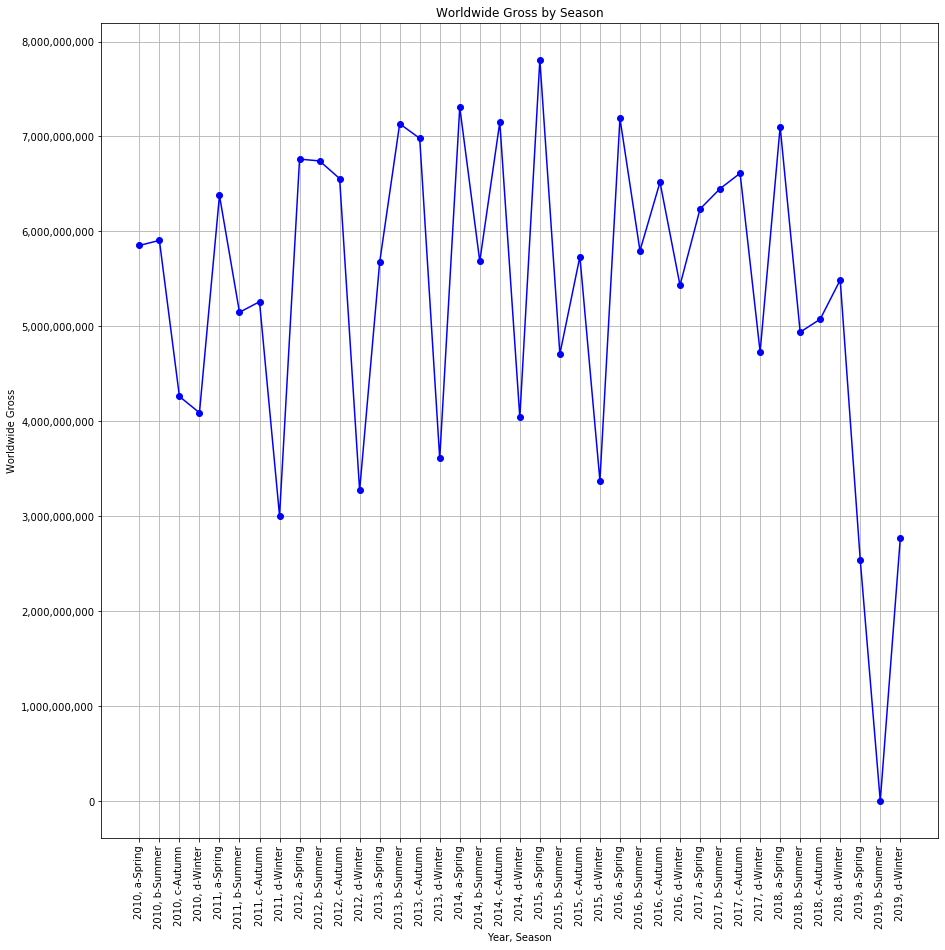

In [920]:
plt.figure(figsize=(15,15))
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.plot(gross_world_df['year_season'], gross_world_df['Worldwide Gross'], 'bo-', )
plt.title('Worldwide Gross by Season')
plt.xlabel('Year, Season')
plt.xticks(rotation='vertical')
plt.ylabel('Worldwide Gross')
plt.grid(True)
plt.show()

In [747]:
movies_df.head()

,title_year,start_year,runtime_minutes,genres,averagerating,numvotes,Action,Adult,Adventure,Animation,...,release_date,production_budget,domestic_gross,worldwide_gross,gross_less_budget,made_money,lost_money,year,season,year_season
349,Inception (2010),2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,1,0,1,0,...,2010-07-16,160000000,292576195,835524642,675524642,1,0,2010,b-Summer,"2010, b-Summer"
335,The Dark Knight Rises (2012),2012,164.0,"Action,Thriller",8.4,1387769,1,0,0,0,...,2012-07-20,275000000,448139099,1084439099,809439099,1,0,2012,b-Summer,"2012, b-Summer"
71,Interstellar (2014),2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334,0,0,1,0,...,2014-11-05,165000000,188017894,666379375,501379375,1,0,2014,c-Autumn,"2014, c-Autumn"
730,Django Unchained (2012),2012,165.0,"Drama,Western",8.4,1211405,0,0,0,0,...,2012-12-25,100000000,162805434,449948323,349948323,1,0,2012,d-Winter,"2012, d-Winter"
82,The Avengers (2012),2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655,1,0,1,0,...,2012-05-04,225000000,623279547,1517935897,1292935897,1,0,2012,a-Spring,"2012, a-Spring"


In [748]:
def season_of_date2(date):
    year = str(date.year)
    seasons = {'spring': pd.date_range(start='21/03/'+year, end='20/06/'+year),
               'summer': pd.date_range(start='21/06/'+year, end='22/09/'+year),
               'autumn': pd.date_range(start='23/09/'+year, end='20/12/'+year)}
    if date in seasons['spring']:
        return 'Spring'
    if date in seasons['summer']:
        return 'Summer'
    if date in seasons['autumn']:
        return 'Autumn'
    else:
        return 'Winter'

# Assuming df has a date column of type `datetime`
movies_df['season2'] = movies_df['release_date'].map(season_of_date2)


In [749]:
movies_df['year_season2'] = movies_df['year'].str.cat(movies_df['season2'],sep=", ")


/Users/matthewnykaza/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [750]:
seasons2 = movies_df['year_season2'].sort_values().unique()

gross_prod_seasons2 = movies_df[['year_season2', 'worldwide_gross', 'production_budget']].groupby('year_season2').sum()

gross_world_df2 = pd.DataFrame(gross_prod_seasons2).rename(columns={'worldwide_gross': 'Worldwide Gross', 'production_budget': 'Production Budget'})


In [751]:
gross_world_df2.head(10)

,Worldwide Gross,Production Budget
year_season2,,
"2010, Autumn",4261319119,1746187650
"2010, Spring",5852206559,1927100000
"2010, Summer",5905376774,1878400000
"2010, Winter",4089796133,1549690000
"2011, Autumn",5259333533,2210207300
"2011, Spring",6378344869,2128800000
"2011, Summer",5147852484,1625285000
"2011, Winter",3004051764,1452410000
"2012, Autumn",6556477346,1857450000


In [752]:
gross_world_df2['Gross Percentage'] = gross_world_df2['Production Budget'] / gross_world_df2['Worldwide Gross'] 

In [753]:
gross_world_df2.describe()

,Worldwide Gross,Production Budget,Gross Percentage
count,3.900000e+01,3.900000e+01,39.000000
mean,5.367132e+09,1.691666e+09,inf
std,1.650233e+09,4.655103e+08,NaN
min,0.000000e+00,1.500000e+07,0.235738
25%,4.485191e+09,1.444555e+09,0.273509
50%,5.684652e+09,1.744085e+09,0.315721
75%,6.584517e+09,2.068200e+09,0.371410
max,7.808571e+09,2.596092e+09,inf


In [931]:
gross_world_df2.head()

,Worldwide Gross,Production Budget,Gross Percentage,gross_mean
year_season2,,,,
"2010, Autumn",4261319119,1746187650,0.409776,5.367132e+09
"2010, Spring",5852206559,1927100000,0.329295,5.367132e+09
"2010, Summer",5905376774,1878400000,0.318083,5.367132e+09
"2010, Winter",4089796133,1549690000,0.378916,5.367132e+09
"2011, Autumn",5259333533,2210207300,0.420245,5.367132e+09


In [932]:
gross_world_df2.reset_index(inplace=True)

In [934]:
gross_world_df2.head()

,year_season2,Worldwide Gross,Production Budget,Gross Percentage,gross_mean
0,"2010, Autumn",4261319119,1746187650,0.409776,5.367132e+09
1,"2010, Spring",5852206559,1927100000,0.329295,5.367132e+09
2,"2010, Summer",5905376774,1878400000,0.318083,5.367132e+09
3,"2010, Winter",4089796133,1549690000,0.378916,5.367132e+09
4,"2011, Autumn",5259333533,2210207300,0.420245,5.367132e+09


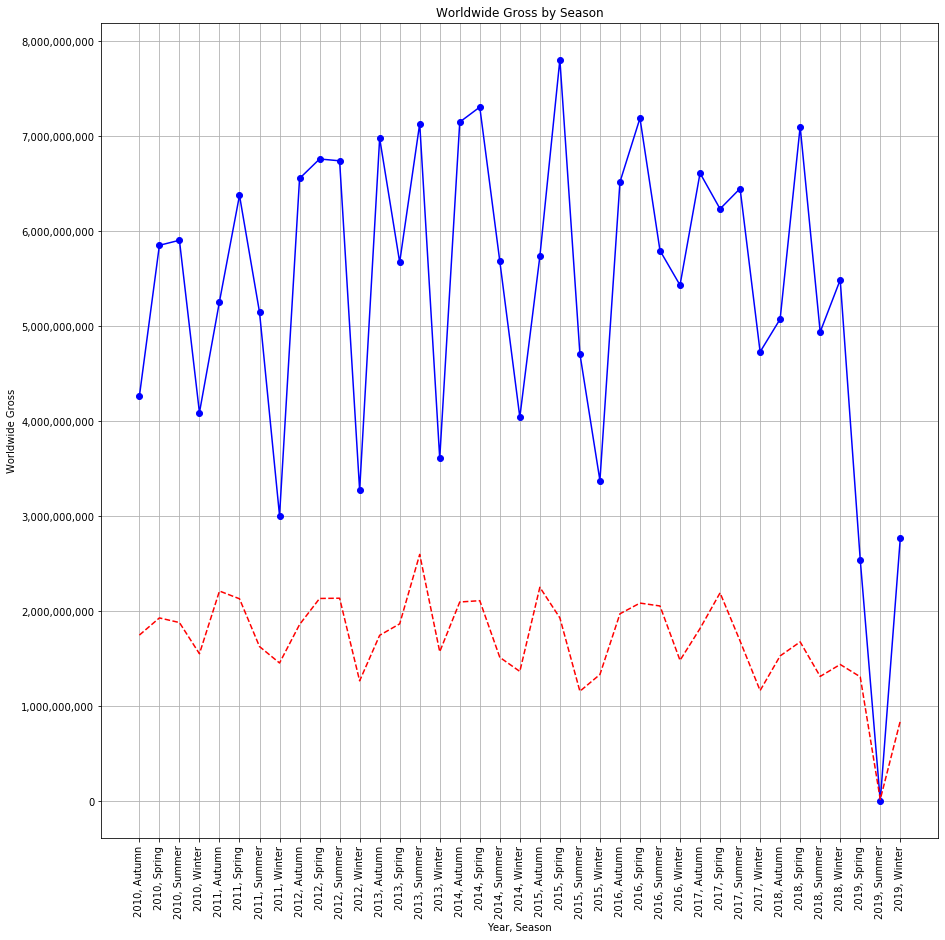

In [937]:
plt.figure(figsize=(15,15))
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.plot(gross_world_df2['year_season2'], gross_world_df2['Worldwide Gross'], 'bo-', gross_world_df2['year_season2'], gross_world_df2['Production Budget'], 'r--' )
plt.title('Worldwide Gross by Season')
plt.xlabel('Year, Season')
plt.xticks(rotation='vertical')
plt.ylabel('Worldwide Gross')
plt.grid(True)
plt.show()

In [960]:
season_money

,Worldwide Gross,Production Budget,Gross Percentage,gross_mean
year_season2,,,,
"2010, Autumn",4261319119,1746187650,0.409776,5.367132e+09
"2010, Spring",5852206559,1927100000,0.329295,5.367132e+09
"2010, Summer",5905376774,1878400000,0.318083,5.367132e+09
"2010, Winter",4089796133,1549690000,0.378916,5.367132e+09
"2011, Autumn",5259333533,2210207300,0.420245,5.367132e+09
"2011, Spring",6378344869,2128800000,0.333754,5.367132e+09
"2011, Summer",5147852484,1625285000,0.315721,5.367132e+09
"2011, Winter",3004051764,1452410000,0.483484,5.367132e+09
"2012, Autumn",6556477346,1857450000,0.283300,5.367132e+09


In [956]:
season_money = gross_world_df2

In [966]:
movie_seasons_df

,title_year,start_year,runtime_minutes,genres,averagerating,numvotes,Action,Adult,Adventure,Animation,...,gross_less_budget,made_money,lost_money,year,season,commercial_success,Spring,Autumn,Summer,Winter
349,Inception (2010),2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,1,0,1,0,...,675524642,1,0,2010,Summer,1,0,0,1,0
335,The Dark Knight Rises (2012),2012,164.0,"Action,Thriller",8.4,1387769,1,0,0,0,...,809439099,1,0,2012,Summer,1,0,0,1,0
71,Interstellar (2014),2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334,0,0,1,0,...,501379375,1,0,2014,Autumn,1,0,1,0,0
730,Django Unchained (2012),2012,165.0,"Drama,Western",8.4,1211405,0,0,0,0,...,349948323,1,0,2012,Winter,1,0,0,0,1
82,The Avengers (2012),2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655,1,0,1,0,...,1292935897,1,0,2012,Spring,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,Light from the Darkroom (2014),2014,90.0,"Action,Drama,Thriller",6.1,11,1,0,0,0,...,-600000,0,1,2014,Winter,0,0,0,0,1
867,The Hadza: Last of the First (2014),2014,71.0,Documentary,7.7,10,0,0,0,0,...,-650000,0,1,2014,Winter,0,0,0,0,1
1064,All You Need Is Love (2014),2014,90.0,Documentary,6.8,9,0,0,0,0,...,3265259,1,0,2014,Autumn,0,0,1,0,0
728,Crossroads (2015),2015,87.0,"Action,Crime,Drama",7.8,8,1,0,0,0,...,-500000,0,1,2015,Summer,0,0,0,1,0


In [958]:
season_money.set_index('year_season2', inplace=True)

In [969]:
season_money = {}



for season in seasons_list:
    season_money[season] = {'Production Budget': movie_seasons_df['production_budget'],
                                         'Worldwide Gross': movie_seasons_df['worldwide_gross'],
                                         }

In [973]:
season_money_df = pd.DataFrame(season_money)

In [975]:
season_money_df.head()

,Spring,Autumn,Summer,Winter
Production Budget,349 160000000 335 275000000 71 16...,349 160000000 335 275000000 71 16...,349 160000000 335 275000000 71 16...,349 160000000 335 275000000 71 16...
Worldwide Gross,349 835524642 335 1084439099 71 ...,349 835524642 335 1084439099 71 ...,349 835524642 335 1084439099 71 ...,349 835524642 335 1084439099 71 ...


ValueError: shape mismatch: objects cannot be broadcast to a single shape

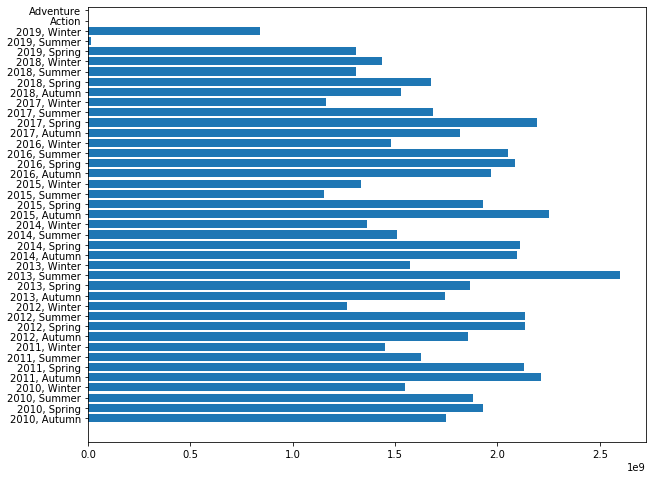

In [965]:
plt.figure(figsize=(10,8))

# stacked horizonal bar charts
plt.barh(season_money.index, season_money['Production Budget'], label='Production Budget')
plt.barh(money_details.index, season_money['Worldwide Gross'], 
         # here, left shows where the stack of the next part begins
         left = season_money['Production Budget'], label='Worldwide Gross')

# grabbing the current axis to format and annotate later
ax = plt.gca()

#inverting y axis so it shows in alphabetical order
ax.invert_yaxis()

# using this line to format the yaxis with commas
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# This tricky bit of code annotates percentages on the chart
y = 0.2 # our start point on our y axis for the details
# Doing this for each genre
for row in season_money.index:
    # grabbing the total for that genre
    x = money_details['Total'][row]
    # grabbing the percentage of popular movies for that genre
    money_perc = money_details['Money Percentage'][row]
    # formatting with f-strings for readability
    percentage = f'{money_perc * 100:,.0f}%' 
    # annotating the chart, locating the annotation at total + 200 and our y height
    ax.annotate(percentage,(x + 5, y))
    # adding 1 to our y for the next genre
    y += 1

plt.title("Made Money vs. Lost Money Movies Per Genre \n (With the Percentage of Lucrative Movies)")
plt.xlabel("Number of Movies")
plt.legend()
plt.show()

In [755]:
gross_world_df2['gross_mean'] = gross_world_df2['Worldwide Gross'].mean()
gross_world_df2.head()

,Worldwide Gross,Production Budget,Gross Percentage,gross_mean
year_season2,,,,
"2010, Autumn",4261319119,1746187650,0.409776,5.367132e+09
"2010, Spring",5852206559,1927100000,0.329295,5.367132e+09
"2010, Summer",5905376774,1878400000,0.318083,5.367132e+09
"2010, Winter",4089796133,1549690000,0.378916,5.367132e+09
"2011, Autumn",5259333533,2210207300,0.420245,5.367132e+09


In [756]:
gross_world_df2.describe()

,Worldwide Gross,Production Budget,Gross Percentage,gross_mean
count,3.900000e+01,3.900000e+01,39.000000,3.900000e+01
mean,5.367132e+09,1.691666e+09,inf,5.367132e+09
std,1.650233e+09,4.655103e+08,NaN,1.932282e-06
min,0.000000e+00,1.500000e+07,0.235738,5.367132e+09
25%,4.485191e+09,1.444555e+09,0.273509,5.367132e+09
50%,5.684652e+09,1.744085e+09,0.315721,5.367132e+09
75%,6.584517e+09,2.068200e+09,0.371410,5.367132e+09
max,7.808571e+09,2.596092e+09,inf,5.367132e+09


In [757]:
movies_df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,start_year,runtime_minutes,averagerating,numvotes,Action,Adult,Adventure,Animation,Biography,Comedy,...,Thriller,Unknown,War,Western,production_budget,domestic_gross,worldwide_gross,gross_less_budget,made_money,lost_money
count,1461.00000,1461.00000,1461.00000,1461.00000,1461.00000,1461.00000,1461.00000,1461.00000,1461.00000,1461.00000,...,1461.00000,1461.00000,1461.00000,1461.00000,1461.00000,1461.00000,1461.00000,1461.00000,1461.00000,1461.00000
mean,2013.85421,107.66461,6.28049,117748.54825,0.30459,0.00000,0.23888,0.06913,0.09103,0.34702,...,0.17591,0.00000,0.01164,0.00753,45157417.48802,57170234.64819,143270455.96509,98113038.47707,0.70363,0.29637
std,2.56957,17.90400,1.06633,165135.72267,0.46039,0.00000,0.42654,0.25376,0.28776,0.47619,...,0.38087,0.00000,0.10728,0.08647,56447224.19098,85294884.79115,235233528.66448,194069971.31494,0.45681,0.45681
min,2010.00000,5.00000,1.60000,5.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,15000.00000,0.00000,0.00000,-200237650.00000,0.00000,0.00000
25%,2012.00000,95.00000,5.70000,16048.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,8000000.00000,3395391.00000,8629895.00000,-604982.00000,0.00000,0.00000
50%,2014.00000,105.00000,6.40000,60369.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,24000000.00000,28842237.00000,54104225.00000,24052249.00000,1.00000,0.00000
75%,2016.00000,118.00000,7.00000,144821.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,0.00000,0.00000,0.00000,0.00000,58000000.00000,69179066.00000,162502774.00000,108514727.00000,1.00000,1.00000
max,2019.00000,180.00000,8.80000,1841066.00000,1.00000,0.00000,1.00000,1.00000,1.00000,1.00000,...,1.00000,0.00000,1.00000,1.00000,410600000.00000,700059566.00000,2048134200.00000,1748134200.00000,1.00000,1.00000


In [759]:
test_df = movies_df

In [989]:
condition_1 = (movies_df['gross_less_budget'] >= 108514727) & (movies_df['averagerating'] >= 7)
condition_2 = (movies_df['gross_less_budget'] < 108514727) | (movies_df['averagerating'] < 7)
conditions= [condition_1, condition_2]
choices = [1,0]
movies_df['commercial_success'] = np.select(conditions, choices, default="")
movies_df.head()


    

,title_year,start_year,runtime_minutes,genres,averagerating,numvotes,Action,Adult,Adventure,Animation,...,release_date,production_budget,domestic_gross,worldwide_gross,gross_less_budget,made_money,lost_money,year,season2,commercial_success
349,Inception (2010),2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,1,0,1,0,...,2010-07-16,160000000,292576195,835524642,675524642,1,0,2010,Summer,1
335,The Dark Knight Rises (2012),2012,164.0,"Action,Thriller",8.4,1387769,1,0,0,0,...,2012-07-20,275000000,448139099,1084439099,809439099,1,0,2012,Summer,1
71,Interstellar (2014),2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334,0,0,1,0,...,2014-11-05,165000000,188017894,666379375,501379375,1,0,2014,Autumn,1
730,Django Unchained (2012),2012,165.0,"Drama,Western",8.4,1211405,0,0,0,0,...,2012-12-25,100000000,162805434,449948323,349948323,1,0,2012,Winter,1
82,The Avengers (2012),2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655,1,0,1,0,...,2012-05-04,225000000,623279547,1517935897,1292935897,1,0,2012,Spring,1


In [778]:
#check for NAN
movies_df.isna().sum()

title_year            0
start_year            0
runtime_minutes       0
genres                0
averagerating         0
numvotes              0
Action                0
Adult                 0
Adventure             0
Animation             0
Biography             0
Comedy                0
Crime                 0
Documentary           0
Drama                 0
Family                0
Fantasy               0
Game-Show             0
History               0
Horror                0
Music                 0
Musical               0
Mystery               0
News                  0
Reality-TV            0
Romance               0
Sci-Fi                0
Short                 0
Sport                 0
Thriller              0
Unknown               0
War                   0
Western               0
release_date          0
production_budget     0
domestic_gross        0
worldwide_gross       0
gross_less_budget     0
made_money            0
lost_money            0
year                  0
season          

In [779]:
movies_df['commercial_success'] = movies_df['commercial_success'].astype('int64')
movies_df.dtypes

title_year                    object
start_year                     int64
runtime_minutes              float64
genres                        object
averagerating                float64
numvotes                       int64
Action                         int64
Adult                          int64
Adventure                      int64
Animation                      int64
Biography                      int64
Comedy                         int64
Crime                          int64
Documentary                    int64
Drama                          int64
Family                         int64
Fantasy                        int64
Game-Show                      int64
History                        int64
Horror                         int64
Music                          int64
Musical                        int64
Mystery                        int64
News                           int64
Reality-TV                     int64
Romance                        int64
Sci-Fi                         int64
S

In [781]:
movies_df.head(50)

,title_year,start_year,runtime_minutes,genres,averagerating,numvotes,Action,Adult,Adventure,Animation,...,worldwide_gross,gross_less_budget,made_money,lost_money,year,season,year_season,season2,year_season2,commercial_success
349,Inception (2010),2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,1,0,1,0,...,835524642,675524642,1,0,2010,b-Summer,"2010, b-Summer",Summer,"2010, Summer",1
335,The Dark Knight Rises (2012),2012,164.0,"Action,Thriller",8.4,1387769,1,0,0,0,...,1084439099,809439099,1,0,2012,b-Summer,"2012, b-Summer",Summer,"2012, Summer",1
71,Interstellar (2014),2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334,0,0,1,0,...,666379375,501379375,1,0,2014,c-Autumn,"2014, c-Autumn",Autumn,"2014, Autumn",1
730,Django Unchained (2012),2012,165.0,"Drama,Western",8.4,1211405,0,0,0,0,...,449948323,349948323,1,0,2012,d-Winter,"2012, d-Winter",Winter,"2012, Winter",1
82,The Avengers (2012),2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655,1,0,1,0,...,1517935897,1292935897,1,0,2012,a-Spring,"2012, a-Spring",Spring,"2012, Spring",1
123,The Wolf of Wall Street (2013),2013,180.0,"Biography,Crime,Drama",8.2,1035358,0,0,0,0,...,389870414,289870414,1,0,2013,d-Winter,"2013, d-Winter",Winter,"2013, Winter",1
175,Shutter Island (2010),2010,138.0,"Mystery,Thriller",8.1,1005960,0,0,0,0,...,299461782,219461782,1,0,2010,d-Winter,"2010, d-Winter",Winter,"2010, Winter",1
818,Guardians of the Galaxy (2014),2014,121.0,"Action,Adventure,Comedy",8.1,948394,1,0,1,0,...,770867516,600867516,1,0,2014,b-Summer,"2014, b-Summer",Summer,"2014, Summer",1
404,Deadpool (2016),2016,108.0,"Action,Adventure,Comedy",8.0,820847,1,0,1,0,...,801025593,743025593,1,0,2016,d-Winter,"2016, d-Winter",Winter,"2016, Winter",1
363,The Hunger Games (2012),2012,142.0,"Action,Adventure,Sci-Fi",7.2,795227,1,0,1,0,...,677923379,597923379,1,0,2012,a-Spring,"2012, a-Spring",Spring,"2012, Spring",1


In [784]:
movie_seasons_df = movies_df

In [786]:
movie_seasons_df.drop(columns=['season', 'year_season', 'year_season2'], inplace=True)
movie_seasons_df.head()

,title_year,start_year,runtime_minutes,genres,averagerating,numvotes,Action,Adult,Adventure,Animation,...,release_date,production_budget,domestic_gross,worldwide_gross,gross_less_budget,made_money,lost_money,year,season2,commercial_success
349,Inception (2010),2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,1,0,1,0,...,2010-07-16,160000000,292576195,835524642,675524642,1,0,2010,Summer,1
335,The Dark Knight Rises (2012),2012,164.0,"Action,Thriller",8.4,1387769,1,0,0,0,...,2012-07-20,275000000,448139099,1084439099,809439099,1,0,2012,Summer,1
71,Interstellar (2014),2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334,0,0,1,0,...,2014-11-05,165000000,188017894,666379375,501379375,1,0,2014,Autumn,1
730,Django Unchained (2012),2012,165.0,"Drama,Western",8.4,1211405,0,0,0,0,...,2012-12-25,100000000,162805434,449948323,349948323,1,0,2012,Winter,1
82,The Avengers (2012),2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655,1,0,1,0,...,2012-05-04,225000000,623279547,1517935897,1292935897,1,0,2012,Spring,1


In [793]:
seasons_col = movies_df['season2']

In [794]:
seasons_col

349     Summer
335     Summer
71      Autumn
730     Winter
82      Spring
         ...  
1137    Winter
867     Winter
1064    Autumn
728     Summer
1424    Autumn
Name: season2, Length: 1461, dtype: object

In [976]:
seasons_list = ['Spring', 'Autumn', 'Summer', 'Winter']

seasons_df = pd.DataFrame(seasons_col)
seasons_df.head(50)

,season2
349,Summer
335,Summer
71,Autumn
730,Winter
82,Spring
123,Winter
175,Winter
818,Summer
404,Winter
363,Spring


In [977]:
for col in seasons_list:
    seasons_df[col] = 0

In [978]:
print(len(seasons_df.index))
print(len(movie_seasons_df.index))

1461
1461


In [979]:
season_sum_dict = {}
for season in seasons_list:
    season_sum_dict[season] = movie_seasons_df[season].sum()

In [980]:
season_sum_dict

{'Spring': 302, 'Autumn': 432, 'Summer': 385, 'Winter': 342}

In [981]:
movie_seasons_df = pd.concat([movie_seasons_df, seasons_df[seasons_list]], axis=1)

In [982]:
movie_seasons_df.head()

,title_year,start_year,runtime_minutes,genres,averagerating,numvotes,Action,Adult,Adventure,Animation,...,season,commercial_success,Spring,Autumn,Summer,Winter,Spring,Autumn,Summer,Winter
349,Inception (2010),2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,1,0,1,0,...,Summer,1,0,0,1,0,0,0,0,0
335,The Dark Knight Rises (2012),2012,164.0,"Action,Thriller",8.4,1387769,1,0,0,0,...,Summer,1,0,0,1,0,0,0,0,0
71,Interstellar (2014),2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334,0,0,1,0,...,Autumn,1,0,1,0,0,0,0,0,0
730,Django Unchained (2012),2012,165.0,"Drama,Western",8.4,1211405,0,0,0,0,...,Winter,1,0,0,0,1,0,0,0,0
82,The Avengers (2012),2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655,1,0,1,0,...,Spring,1,1,0,0,0,0,0,0,0


In [983]:
movie_seasons_df.rename(columns={'season2': 'season'}, inplace=True)


In [984]:
for row in seasons_df.index:
    for season in seasons_list:
        if season in seasons_df['season'][row]:
            seasons_df[season][row] = 1
            

KeyError: 'season'

In [986]:
len(movies_df)

1461

In [987]:
movie_seasons_df.reset_index()

,index,title_year,start_year,runtime_minutes,genres,averagerating,numvotes,Action,Adult,Adventure,...,season,commercial_success,Spring,Autumn,Summer,Winter,Spring,Autumn,Summer,Winter
0,349,Inception (2010),2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,1,0,1,...,Summer,1,0,0,1,0,0,0,0,0
1,335,The Dark Knight Rises (2012),2012,164.0,"Action,Thriller",8.4,1387769,1,0,0,...,Summer,1,0,0,1,0,0,0,0,0
2,71,Interstellar (2014),2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334,0,0,1,...,Autumn,1,0,1,0,0,0,0,0,0
3,730,Django Unchained (2012),2012,165.0,"Drama,Western",8.4,1211405,0,0,0,...,Winter,1,0,0,0,1,0,0,0,0
4,82,The Avengers (2012),2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655,1,0,1,...,Spring,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,1137,Light from the Darkroom (2014),2014,90.0,"Action,Drama,Thriller",6.1,11,1,0,0,...,Winter,0,0,0,0,1,0,0,0,0
1457,867,The Hadza: Last of the First (2014),2014,71.0,Documentary,7.7,10,0,0,0,...,Winter,0,0,0,0,1,0,0,0,0
1458,1064,All You Need Is Love (2014),2014,90.0,Documentary,6.8,9,0,0,0,...,Autumn,0,0,1,0,0,0,0,0,0
1459,728,Crossroads (2015),2015,87.0,"Action,Crime,Drama",7.8,8,1,0,0,...,Summer,0,0,0,1,0,0,0,0,0


In [988]:
commercial_season_details = {}

for season in seasons_list:
    season_df = movie_seasons_df.loc[movie_seasons_df[season] == 1]
    season_pop = season_df['commercial_success'].sum()
    season_unpop = len(season_df) - season_pop
    season_pop_perc = season_df['commercial_success'].mean()
    season_unpop_perc = 1 - season_pop_perc
    commercial_season_details[season] = {'Commercial Success': season_pop,
                                         'Commercial Failure': season_unpop,
                                         'Total': season_pop + season_unpop,
                                         }

ValueError: Cannot index with multidimensional key

In [906]:
season_details = pd.DataFrame(commercial_season_details).T
season_details

,Commercial Success,Commercial Failure,Total
Spring,47,255,302
Autumn,63,369,432
Summer,30,355,385
Winter,34,308,342


In [907]:
season_details['Success Percentage'] = season_details['Commercial Success'] / season_details['Total']
season_details['Failure Percentage'] = season_details['Commercial Failure'] / season_details['Total']

In [908]:
season_details.head()

,Commercial Success,Commercial Failure,Total,Success Percentage,Failure Percentage
Spring,47,255,302,0.155629,0.844371
Autumn,63,369,432,0.145833,0.854167
Summer,30,355,385,0.077922,0.922078
Winter,34,308,342,0.099415,0.900585


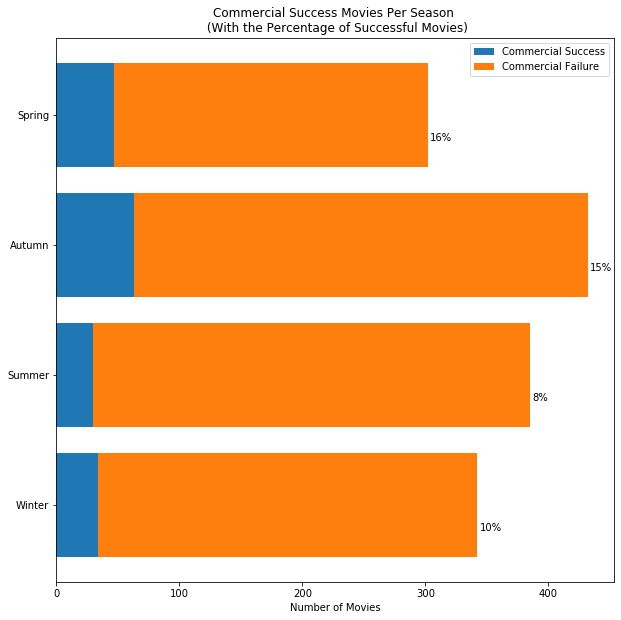

In [919]:
plt.figure(figsize=(10,10))

# stacked horizonal bar charts
plt.barh(season_details.index, season_details['Commercial Success'], label='Commercial Success')
plt.barh(season_details.index, season_details['Commercial Failure'], 
         # here, left shows where the stack of the next part begins
         left = season_details['Commercial Success'], label='Commercial Failure')

# grabbing the current axis to format and annotate later
ax = plt.gca()

#inverting y axis so it shows in alphabetical order
ax.invert_yaxis()

# using this line to format the yaxis with commas
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# This tricky bit of code annotates percentages on the chart
y = 0.2 # our start point on our y axis for the details
# Doing this for each genre
for row in season_details.index:
    # grabbing the total for that genre
    x = season_details['Total'][row]
    # grabbing the percentage of popular movies for that genre
    season_perc = season_details['Success Percentage'][row]
    # formatting with f-strings for readability
    percentage = f'{season_perc * 100:,.0f}%' 
    # annotating the chart, locating the annotation at total + 200 and our y height
    ax.annotate(percentage,(x+2 , y))
    # adding 1 to our y for the next genre
    y += 1

plt.title("Commercial Success Movies Per Season \n (With the Percentage of Successful Movies)")
plt.xlabel("Number of Movies")
plt.legend()
plt.show()

In [ ]:
seasons = season_details['index']
margin_bottom = np.zeros(len(season_details['season']))
for num, season in enumerate(seasons):
    

fig, ax = plt.subplots()
ax.bar()

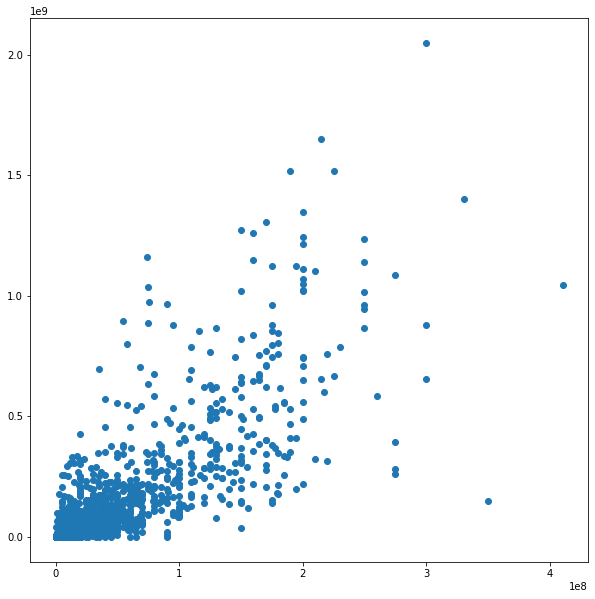

In [938]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x= movies_df['production_budget'], y=movies_df['worldwide_gross'])



In [172]:
#save cleaned dataset as CSV
movies_df.to_csv('ZippedData/cleaned_movie_data.csv')